<a href="https://colab.research.google.com/github/Rogerio-mack/IMT_Ciencia_de_Dados/blob/main/IMT_PF_solucao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="ITM">
</head>

<img src="https://maua.br/images/selo-60-anos-maua.svg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Case: **Student Stress**

Neste case você vai empregar dados relacionados a estudantes para determinar o seu nível de stress.

In [ ]:
df_train = pd.read_csv('https://github.com/Rogerio-mack/IMT_Ciencia_de_Dados/raw/main/data/StressStudentsTrain.csv')
display(df_train.head(), df_train.shape)

df_test = pd.read_csv('https://github.com/Rogerio-mack/IMT_Ciencia_de_Dados/raw/main/data/StressStudentsTest.csv')
display(df_test.head(), df_test.shape)

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,0,28,0,3,1,2,4,2,1,3,...,5,4,2,5,1,3,1,1,1,0
1,14,30,0,9,2,3,5,5,1,4,...,3,5,0,0,4,1,2,3,0,0
2,21,11,1,20,3,3,1,4,5,1,...,1,1,3,2,5,1,5,5,4,2
3,21,4,1,26,3,3,1,3,3,2,...,2,2,5,1,5,1,5,4,4,2
4,3,0,1,4,1,3,1,5,4,3,...,3,1,1,2,1,1,0,4,4,2


(880, 21)

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,7,30,0,3,1,2,5,2,1,4,...,5,5,1,4,1,3,2,1,1,0
1,15,0,1,27,3,3,1,5,5,2,...,1,1,4,2,4,1,4,4,4,2
2,14,19,1,10,2,1,2,4,3,2,...,3,2,2,2,2,2,2,3,3,1
3,16,4,1,26,4,3,1,4,5,2,...,1,2,5,1,4,1,5,5,4,2
4,7,29,0,5,1,2,4,1,1,3,...,4,5,1,5,1,3,2,1,1,0


(220, 21)

# Exercício 1. **Decision Tree Classification**

Neste exercício você fará um modelo de árvore de decisão para predição o nível de stress dos estudantes.






## Exercício 1.1.

Empregue o `GridSearchCV`, com 5 partições e `shuffle=True`, para selecionar os seguintes melhores hiperparâmetros de um modelo de árvore de decisão:

- *profundidade máxima da árvore de decisão*, entre 3 e 10.
- *critério de classificação dos nós*, todos critérios.
- *número mínimo de amostras requeridas para separação de um nó interno*, entre 2 e 4.

**Para a métrica** **`f1_macro`**. Empregue em todos casos cabíveis `random_state=123`.

**Não normalize** os dados. Aqui você vai empregar uma árvore de decisão que é um modelo que não emprega diretamente os valores, mas apenas proporção em que os valores ocorrem.

Dica:
1. Informando o `random_state=123` no `cv=StratifiedKFold(5, shuffle=True, random_state=123)`, mas não é o único lugar que precisa indicar o  `random_state`...

**Q1. Quais os melhores hiperparâmetros e a acuracidade obtida?**

In [ ]:
X_train = df_train.drop(columns='stress_level')
X_test = df_test.drop(columns='stress_level')

y_train = df_train['stress_level']
y_test = df_test['stress_level']

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

param_grid = {'max_depth': range(3,11),
              'criterion': ['gini','entropy','log_loss'],
              'min_samples_split': range(2,5)}

clf = GridSearchCV(DecisionTreeClassifier(random_state=123),
                   param_grid,
                   cv=StratifiedKFold(5, shuffle=True, random_state=123),
                   scoring='f1_macro')

clf.fit(X_train, y_train)

# print(clf.cv_results_)
print(clf.best_estimator_)

clf = clf.best_estimator_

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))



DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_split=3,
                       random_state=123)
              precision    recall  f1-score   support

           0       0.85      0.92      0.88        74
           1       0.98      0.90      0.94        72
           2       0.91      0.91      0.91        74

    accuracy                           0.91       220
   macro avg       0.91      0.91      0.91       220
weighted avg       0.91      0.91      0.91       220



## Exercício 1.2.

**Q2. Use a árvore de decisão obtida ou o cálculo de informação mútua (=ganho de informação) e responda, qual atributo traz mais informação para determinação do nível de stress dos estudantes?**

### Várias soluções aqui levam na mesma resposta...

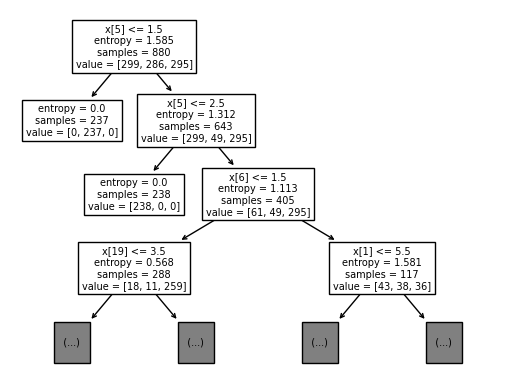

In [ ]:
from sklearn import tree

tree.plot_tree(clf,max_depth=3)
plt.show()

In [ ]:
df_train.columns[5]

'blood_pressure'

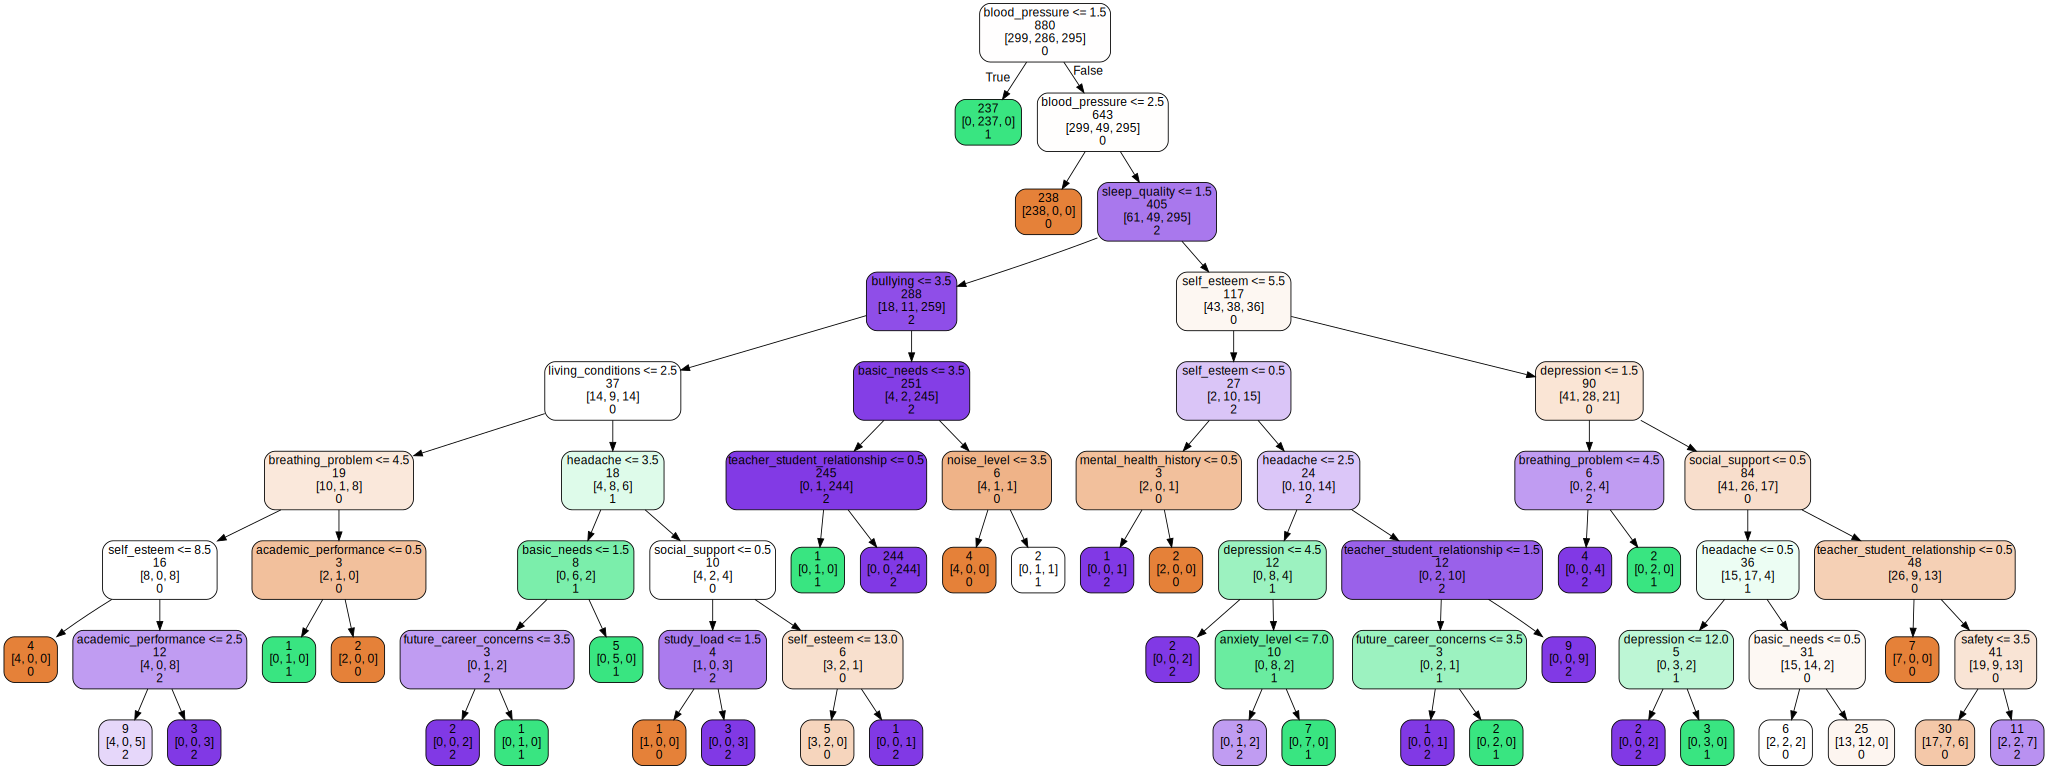

In [ ]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None,
                     feature_names=list(df_train.columns[0:-1].values),
                     class_names=list(sorted(df_train['stress_level'].unique().astype('str'))),
                     filled=True, rounded=True,
                     special_characters=False,
                     proportion=False, impurity=False, node_ids=False,label=None)
graph = graphviz.Source(dot_data)
graph.render('Student_Stress_Decision_Tree') # para gravação em .pdf
graph

In [ ]:
from sklearn.feature_selection import mutual_info_classif

mutual_info = mutual_info_classif(df_train.drop(columns='stress_level'), df_train['stress_level'], discrete_features=True)
mutual_info

array([0.65316912, 0.65653991, 0.23484186, 0.67860631, 0.56553767,
       0.74337867, 0.66538664, 0.35818188, 0.40734202, 0.38500481,
       0.48546127, 0.52173602, 0.51656025, 0.38827086, 0.5157142 ,
       0.66506809, 0.53515928, 0.49108819, 0.51154916, 0.65022446])

In [ ]:
mutual_info_df = pd.DataFrame()
mutual_info_df['feature'] = df_train.drop(columns='stress_level').columns
mutual_info_df['mutual_info'] = mutual_info

mutual_info_df = mutual_info_df.sort_values('mutual_info',ascending=False)
mutual_info_df

,feature,mutual_info
5,blood_pressure,0.743379
3,depression,0.678606
6,sleep_quality,0.665387
15,future_career_concerns,0.665068
1,self_esteem,0.656540
0,anxiety_level,0.653169
19,bullying,0.650224
4,headache,0.565538
16,social_support,0.535159
11,basic_needs,0.521736


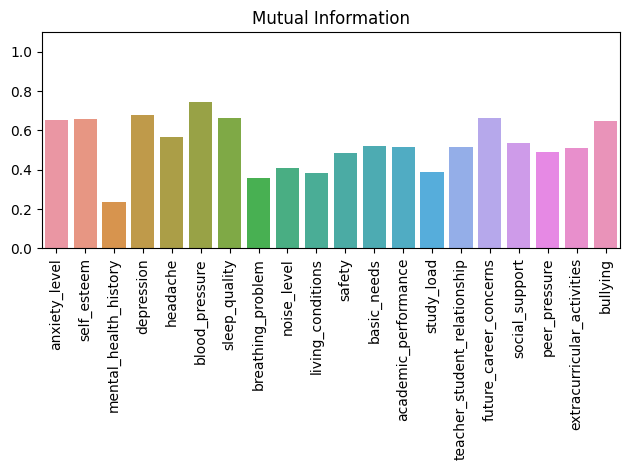

In [ ]:
fig, ax = plt.subplots(1,1)

sns.barplot(x=df_train.drop(columns='stress_level').columns, y=mutual_info, ax=ax)
ax.set_title('Mutual Information')
ax.set_ylim([0,1.1])

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()

# Exercício 2. **Decision Tree Classification with PCA**

Neste exercício você fará um modelo de árvore de decisão para predição o nível de stress dos estudantes a partir de componentes principais dos dados.






## Exercício 2.1.

Empregue o **mesmo `GridSearchCV` do exercício anterior**, com 5 partições e `shuffle=True`, para  selecionar os seguintes melhores hiperparâmetros de um modelo de árvore de decisão:

- *profundidade máxima da árvore de decisão*, entre 3 e 10.
- *critério de classificação dos nós*, todos critérios.
- *número mínimo de amostras requeridas para separação de um nó interno*, entre 2 e 4.

**Para a métrica** **`f1_macro`**, mas agora **empregando apenas os componentes principais necessários para atingir 80% da variância dos dados**. Como antes, empregue em todos casos cabíveis `random_state=123`.

Dica:
1. **Agora é necessário normalizar os dados?** reveja o PCA! E se for normalizar opte pelo `standardscale`.


**Q3. Quantos componentes principais são necessários para atingir 80% da variação dos dados?**

**Q4. Quais os melhores hiperparâmetros e a acuracidade obtida com os componentes principais?**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler =  StandardScaler()

X_train = scaler.fit_transform(df_train.drop(columns='stress_level'))
X_test = scaler.transform(df_test.drop(columns='stress_level'))

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=None) # ou aqui
# pca = PCA(0.8)


pca.fit(X_train)

PCA(n_components=0.8)

In [ ]:
pca.explained_variance_ratio_.cumsum()

array([0.58982041, 0.64905497, 0.68419364, 0.71422871, 0.74305118,
       0.77068283, 0.79480693, 0.8177585 ])

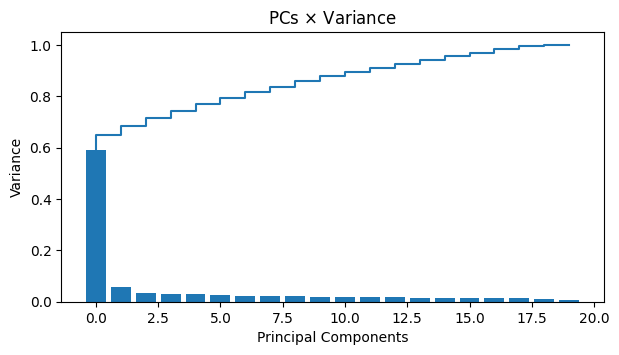

In [ ]:
plt.figure(figsize=(7,3.5))

plt.bar(np.arange(0,len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_)
plt.step(np.arange(0,len(pca.explained_variance_ratio_)), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Principal Components")
plt.ylabel("Variance")
plt.title("PCs $\\times$ Variance")
plt.show()


In [ ]:
X_train = pca.transform(X_train)[:,0:8]
X_test = pca.transform(X_test)[:,0:8]

In [ ]:
X_train.shape, X_test.shape

((880, 8), (220, 8))

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

param_grid = {'max_depth': range(3,11),
              'criterion': ['gini','entropy','log_loss'],
              'min_samples_split': range(2,5)}

clf = GridSearchCV(DecisionTreeClassifier(random_state=123),
                   param_grid,
                   cv=StratifiedKFold(5, shuffle=True, random_state=123),
                   scoring='f1_macro')

clf.fit(X_train, y_train)

# print(clf.cv_results_)
print(clf.best_estimator_)

clf = clf.best_estimator_

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=123)
              precision    recall  f1-score   support

           0       0.82      0.92      0.87        74
           1       0.86      0.89      0.88        72
           2       1.00      0.85      0.92        74

    accuracy                           0.89       220
   macro avg       0.89      0.89      0.89       220
weighted avg       0.89      0.89      0.89       220



In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print('\nMatriz de Confusão:\n')
print(cm)
print()


Matriz de Confusão:

[[68  6  0]
 [ 8 64  0]
 [ 7  4 63]]



# Exercício 3. **Clustering $\times$ Test**

Neste exercício você está interessado em saber que tipo de clusterização hierárquica apresenta uma *Taxa Correta de Classificação* (Acurácia de Clusterização) **sobre o conjunto de teste** e poder comparar esse resultado com a eficiência das classificações anteriores.






## Exercício 3.1.

Aplique dois modelos de clusterização hierárquica, um com o *esquema de ligação* padrão (`ward`) e outro com esquema de ligação que corresponde à distância máxima do elemento ao grupo.

**Q5. Qual modelo apresenta a maior Taxa Correta de Classificação e qual é esse valor?**



In [ ]:
from sklearn.preprocessing import StandardScaler
scaler =  StandardScaler()

X_test = scaler.fit_transform(df_test.drop(columns='stress_level'))

In [ ]:
from sklearn.cluster import KMeans, AgglomerativeClustering

hclust1 = AgglomerativeClustering(n_clusters=3,linkage='complete').fit(X_test)
hclust2 = AgglomerativeClustering(n_clusters=3,linkage='ward').fit(X_test)

cm_hclust1 = confusion_matrix(y_test, hclust1.labels_)
cm_hclust2 = confusion_matrix(y_test, hclust2.labels_)

print(cm_hclust1, '\n\n', cm_hclust2)

[[66  6  2]
 [63  6  3]
 [ 2  7 65]] 

 [[12 62  0]
 [72  0  0]
 [11  0 63]]


In [ ]:
cm_hclust1 = cm_hclust1[[0,1,2],:]
cm_hclust2 = cm_hclust2[[1,0,2],:]

for cm in [cm_hclust1 , cm_hclust2 ]:
  print(cm, '\n', cm.diagonal().sum() / cm.sum())


[[66  6  2]
 [63  6  3]
 [ 2  7 65]] 
 0.6227272727272727
[[72  0  0]
 [12 62  0]
 [11  0 63]] 
 0.8954545454545455


### Aqui um suplemento...

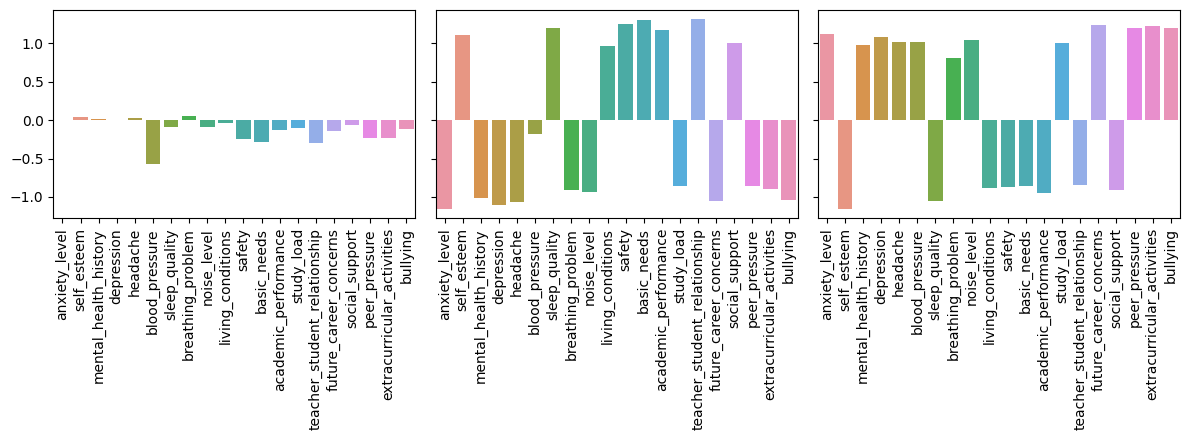

In [ ]:
fig, ax = plt.subplots(1,3,figsize=(12,4.5),sharey=True)

ax[0].tick_params(axis='x', labelrotation = 90)
sns.barplot(x=df_train.columns[0:-1],y=X_test[ hclust2.labels_ == 0 ].mean(axis=0),ax=ax[0])
ax[1].tick_params(axis='x', labelrotation = 90)
sns.barplot(x=df_train.columns[0:-1],y=X_test[ hclust2.labels_ == 1 ].mean(axis=0),ax=ax[1])
ax[2].tick_params(axis='x', labelrotation = 90)
sns.barplot(x=df_train.columns[0:-1],y=X_test[ hclust2.labels_ == 2 ].mean(axis=0),ax=ax[2])

plt.tight_layout()
plt.show()

In [ ]:
medias_grupos = np.array([X_test[ hclust2.labels_ == 0 ].mean(axis=0).mean(), X_test[ hclust2.labels_ == 1 ].mean(axis=0).mean(), X_test[ hclust2.labels_ == 2 ].mean(axis=0).mean()])
medias_grupos

array([-0.12327674, -0.08794177,  0.27243937])

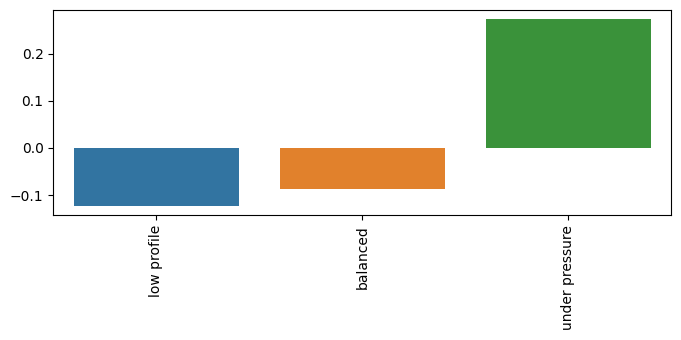

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(7,3.5),sharey=True)

ax.tick_params(axis='x', labelrotation = 90)
sns.barplot(x=['low profile','balanced','under pressure'],y=medias_grupos,ax=ax)

plt.tight_layout()
plt.show()

# Case: **NetFlix Stocks**

Neste case você vai empregar técnicas de séries temporais para previsão do preço das ações da NetFlix.

In [ ]:
%%capture
!pip install yfinance

In [ ]:
import yfinance as yf

df_daily = yf.download(['NFLX'],'2019-11-01','2021-01-01')
df_daily = df_daily['Adj Close']

display(df_daily)

[*********************100%%**********************]  1 of 1 completed


Date
2019-11-01    286.809998
2019-11-04    292.859985
2019-11-05    288.029999
2019-11-06    288.589996
2019-11-07    289.570007
                 ...    
2020-12-24    513.969971
2020-12-28    519.119995
2020-12-29    530.869995
2020-12-30    524.590027
2020-12-31    540.729980
Name: Adj Close, Length: 294, dtype: float64

In [ ]:
# df_daily.to_csv('netflix_price.csv') # also on GitHub

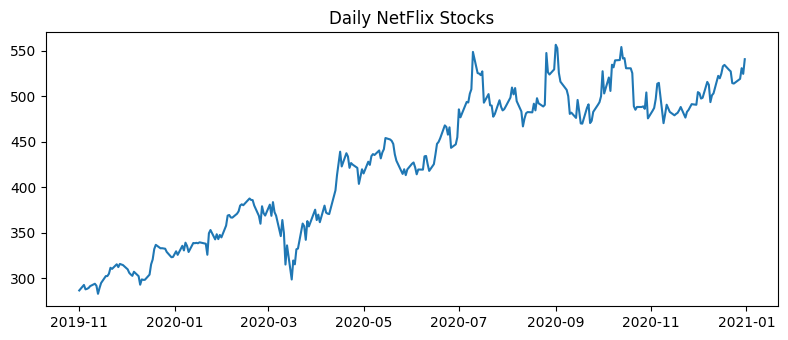

In [ ]:
plt.figure(figsize=(8,3.5))

plt.plot(df_daily)
plt.title('Daily NetFlix Stocks')

plt.tight_layout()
plt.show()


# Exercício 4. **ARIMA**

Neste exercício você vai empregar um **modelo ARIMA** para uma **previsão do valor médio semanal das ações da NetFlix**.






## Exercício 3.1.

Faça as transformações necessárias na série acima e o teste de Dickey-Fuller para verificar se a série dos **valores médios semanais** é estacionária. Se a série não for estacionária aplique a técnica de diferenciação até torná-la estacionária.

**Q6. Qual a ordem de diferenciação empregada para tornar a série estacionária e qual o p-value obtido no teste de Dickey-Fuller dessa série?**

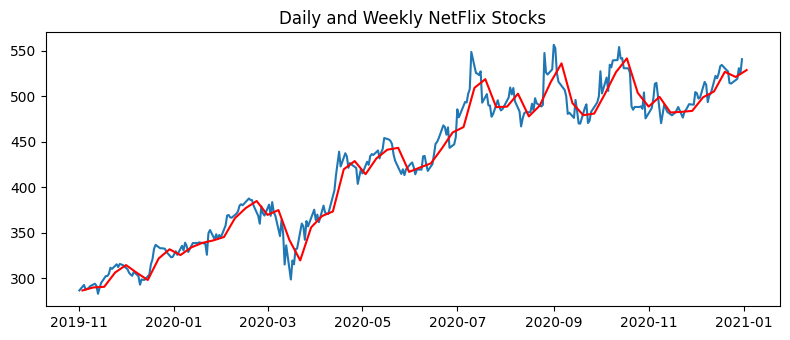

In [ ]:
plt.figure(figsize=(8,3.5))

df_weekly = df_daily.resample('W').mean()

plt.plot(df_daily)
plt.plot(df_weekly,c='r')
plt.title('Daily and Weekly NetFlix Stocks')

plt.tight_layout()
plt.show()

In [ ]:
df = df_weekly

In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])


ADF Statistic: -1.352619
p-value: 0.604769


In [ ]:
df = df.diff(1)
df = df.dropna()

In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])


ADF Statistic: -5.218918
p-value: 0.000008


## Exercício 3.2.

Você vai empregar um modelo ARIMA (`statsmodels`). Com base no exercício anterior e os gráficos de auto correlação defina os parâmetros do modelo e exceute o modelo ARIMA.

**Q7. Quais os parâmetros (p,d,q) do modelo ARIMA a serem empregados e o AIC obtido desse modelo?**

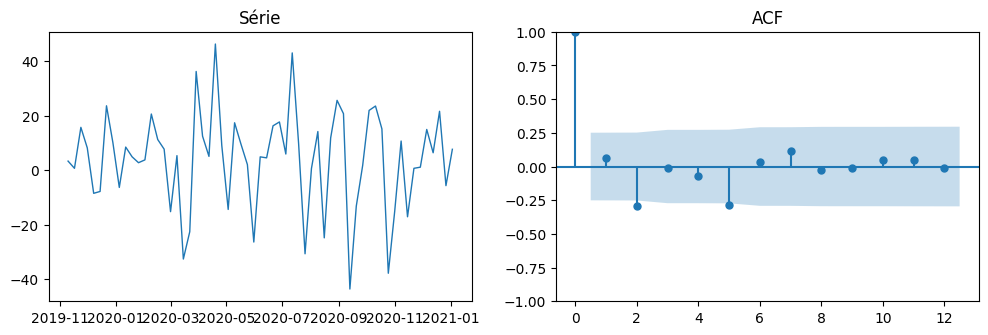

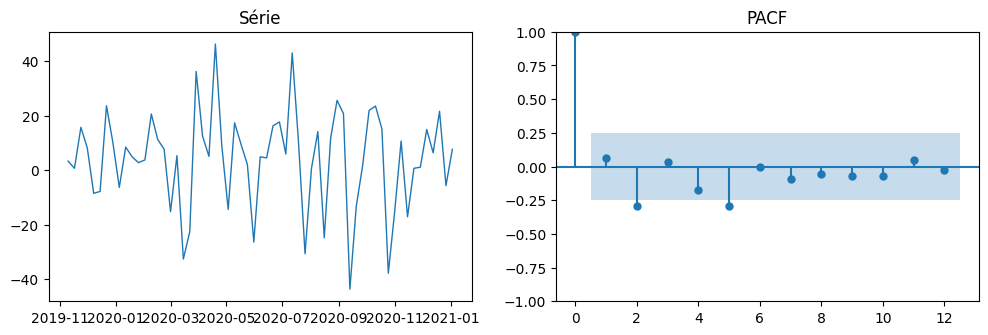

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12,3.5))
ax1.plot(df,linestyle='solid',alpha=1,lw=1)
ax1.title.set_text('Série')
y=plot_acf(df,lags=12,ax=ax2, title="ACF")

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12,3.5))
ax1.plot(df,linestyle='solid',alpha=1,lw=1)
ax1.title.set_text('Série')
y=plot_pacf(df,lags=12,ax=ax2, title="PACF")

In [ ]:
# informe aqui os parâmetros, o código abaixo já está pronto para execução do modelo

p = 5; d = 1; q = 5

In [ ]:
df = df_weekly

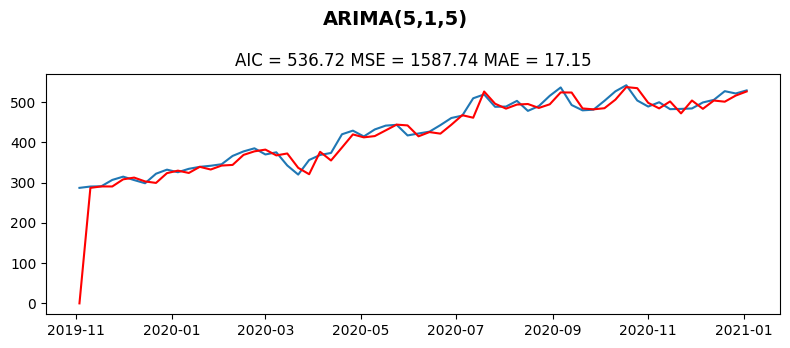

                               SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                   62
Model:                 ARIMA(5, 1, 5)   Log Likelihood                -257.359
Date:                Tue, 21 Nov 2023   AIC                            536.718
Time:                        00:06:38   BIC                            559.938
Sample:                    11-03-2019   HQIC                           545.818
                         - 01-03-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0460      0.856     -0.054      0.957      -1.724       1.631
ar.L2          0.0415      0.384      0.108      0.914      -0.712       0.795
ar.L3         -0.7248      0.265     -2.740      0.0

In [ ]:
import warnings
warnings.filterwarnings('ignore')
# warnings.filterwarnings('default')

from statsmodels.tsa.arima.model import ARIMA

plt.figure(figsize=(8,3.5))

model = ARIMA(df, order=(p,d,q))
results = model.fit(method_kwargs={'maxiter':1000})

plt.plot(df,label='real')
plt.plot(results.fittedvalues, color='red',label='model')

plt.title(f'AIC = {results.aic:.2f} MSE = {results.mse:.2f} MAE = {results.mae:.2f}')
plt.suptitle(f'ARIMA({p},{d},{q})',weight='bold',fontsize=14)

plt.tight_layout()
plt.show()

print(results.summary())


## Exercício 3.3.

Aplique o modelo acima para uma previsão do valor da ação para as 4 próximas semanas.

**Q8. Qual seria previsão do modelo para o valor médio da ação nas próximas 4 semanas ('2021-01-31')?**

In [ ]:
df.tail()

Date
2020-12-06    498.897998
2020-12-13    505.270001
2020-12-20    526.876013
2020-12-27    521.172485
2021-01-03    528.827499
Freq: W-SUN, Name: Adj Close, dtype: float64

In [ ]:
df.head()

Date
2019-11-03    286.809998
2019-11-10    290.123999
2019-11-17    290.789996
2019-11-24    306.500006
2019-12-01    314.657494
Freq: W-SUN, Name: Adj Close, dtype: float64

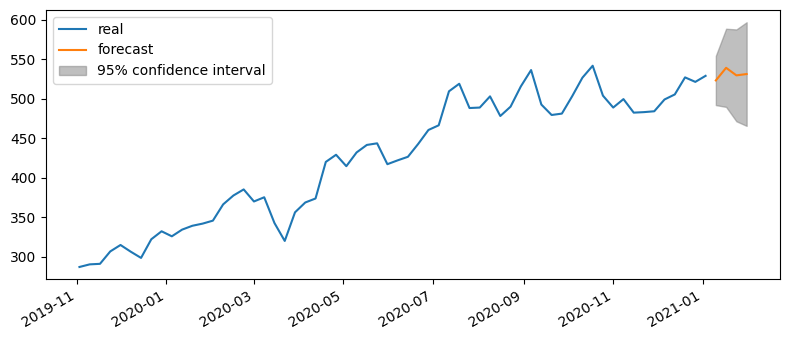

In [ ]:
from statsmodels.graphics.tsaplots import plot_predict

fig, ax = plt.subplots(figsize=(8,3.5))
ax.plot(df,label='real')
plot_predict(results, start='2021-01-10', end='2021-01-31', ax=ax)

plt.tight_layout()
plt.show()

In [ ]:
results.forecast(4)

2021-01-10    523.025278
2021-01-17    538.983693
2021-01-24    529.433562
2021-01-31    531.088768
Freq: W-SUN, Name: predicted_mean, dtype: float64

In [ ]:
results.predict(start='2019-11-03', end='2021-01-31')

2019-11-03      0.000000
2019-11-10    286.818317
2019-11-17    290.395368
2019-11-24    290.244172
2019-12-01    308.030314
                 ...    
2021-01-03    526.176480
2021-01-10    523.025278
2021-01-17    538.983693
2021-01-24    529.433562
2021-01-31    531.088768
Freq: W-SUN, Name: predicted_mean, Length: 66, dtype: float64

### Suplemento: Comparando com o valor real e `pmdarima`


In [ ]:
df_daily_real = yf.download(['NFLX'],start='2021-01-10', end='2021-01-31')
df_daily_real = df_daily_real['Adj Close']
df_daily_real = df_daily_real.resample('W').mean()

display(df_daily_real)

[*********************100%%**********************]  1 of 1 completed


Date
2021-01-17    499.996002
2021-01-24    558.280006
2021-01-31    542.596008
Freq: W-SUN, Name: Adj Close, dtype: float64